<a href="https://colab.research.google.com/github/pascal-maker/Python/blob/master/Labo_06_Stationaire_tijdsreeksen_opdracht.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:darkorange"> Stationaire tijdsreeksen opdracht opgave

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')
import numpy as np
sns.set_style("darkgrid")

## <span style="color:deeppink"> Vraag 1 - ziektegevallen </span>

Lees het bestand `zieken.csv` in, gebruik de eerste kolom als index

In [4]:
dataset = pd.read_csv('zieken.csv', index_col = 0)
dataset.head()

,Aantal zieken
Dag,
1,9
2,12
3,12
4,19
5,16


Stel de data voor met een passende grafiek die duidelijk het verloop van het aantal zieken per dag weergeeft.  

Text(0, 0.5, 'Aantal zieken')

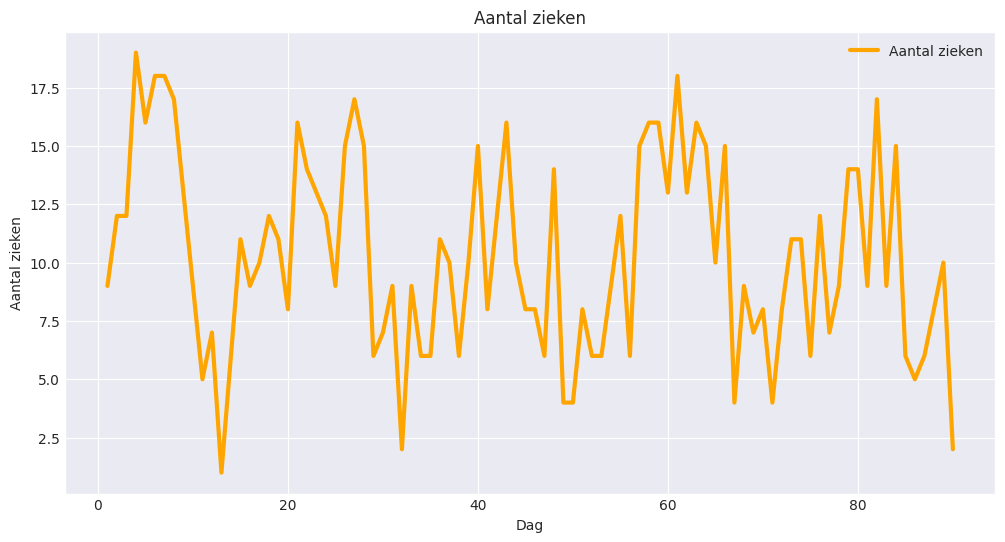

In [5]:
dataset.plot(color='orange', linewidth=3, figsize=(12,6))
plt.title('Aantal zieken')
plt.xlabel("Dag")
plt.ylabel("Aantal zieken")

Ga na via de trendlijn of er al dan niet sprake is van een stationaire tijdreeks.

In [7]:
from sklearn import datasets, linear_model
x = dataset.index.values
y = dataset[dataset.columns[0]].values
regressionline = linear_model.LinearRegression()
regressionline.fit(x.reshape(-1,1),y)
print('Intercept =', regressionline.intercept_ )
print('Richtingscoëfficiënt = ', regressionline.coef_[0])

Intercept = 11.571285892634208
Richtingscoëfficiënt =  -0.02818454953286414


<Axes: xlabel='Dag'>

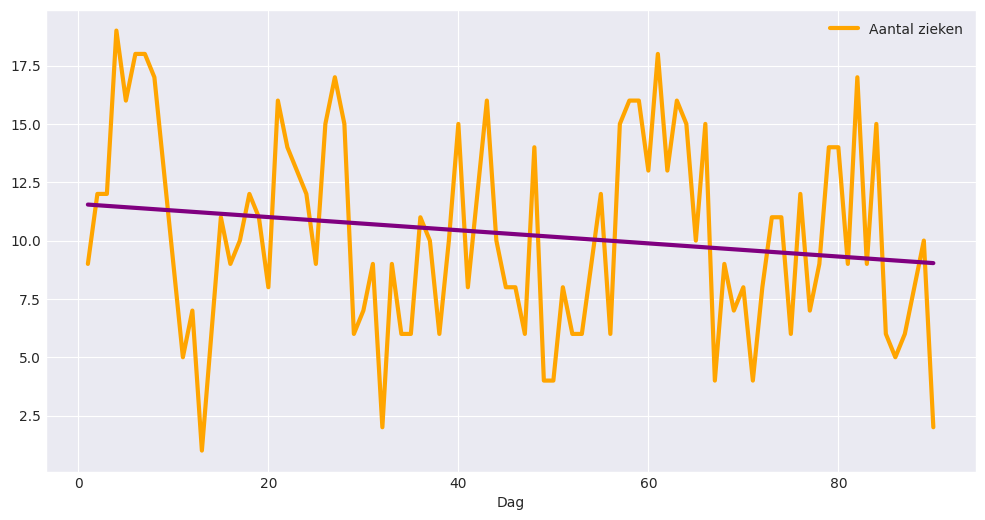

In [8]:
dataset.plot(color='orange', linewidth=3, figsize=(12,6))
sns.lineplot(x=x,y=regressionline.predict(x.reshape(-1,1)),color='purple',linewidth=3)

Gebruik autocorrelatie om patronen te detecteren. Is er periodiciteit? Met andere woorden zijn er patronen die zich constant herhalen? Zo ja, hoe lang duurt zo een patroon?

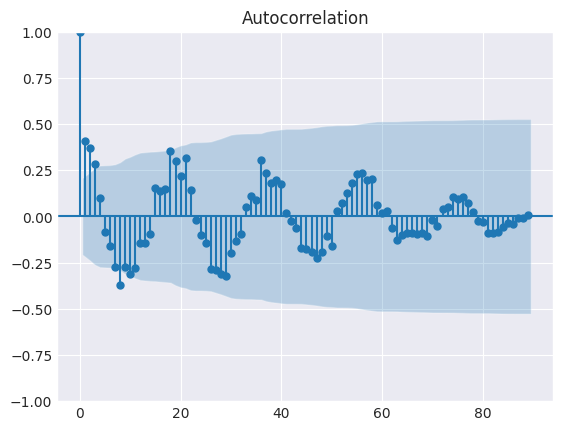

In [9]:
fig = plot_acf(dataset.iloc[:,0], lags=len(dataset)-1)

Vergelijk onderstaande voorspellingsmethodes in termen van de MAE (Mean Absolute Error) en de MAPE (Mean Absolute Percentage Error).
- Voorspelde waarde is de huidige waarde
- Voorspelde waarde is het 3 punts moving average
- Voorspelde waarde is het 5 punts moving average
- Voorspelde waarde is het 10 punts moving average
- Voorspelde waarde via exponentiële demping, zoek de optimale alpha.


In [10]:
dataset['huidige waarde'] = dataset['Aantal zieken'].shift(1)
dataset['absolute fout huidige waarde'] = abs(dataset['huidige waarde'] - dataset['Aantal zieken'])
print("Mean absolute error huidige waarde: ", dataset['absolute fout huidige waarde'].mean())
dataset['procentuele fout huidige waarde'] = abs(dataset['absolute fout huidige waarde']/dataset['Aantal zieken']*100)
print("Mean absolute percentage error huidige waarde: ", dataset['procentuele fout huidige waarde'].mean(), "%")
dataset.head()

Mean absolute error huidige waarde:  3.696629213483146
Mean absolute percentage error huidige waarde:  55.01327894381952 %


,Aantal zieken,huidige waarde,absolute fout huidige waarde,procentuele fout huidige waarde
Dag,,,,
1,9,NaN,NaN,NaN
2,12,9.0,3.0,25.000000
3,12,12.0,0.0,0.000000
4,19,12.0,7.0,36.842105
5,16,19.0,3.0,18.750000


In [11]:
dataset['3MA'] = dataset['Aantal zieken'].rolling(3).mean().shift()
dataset['absolute fout 3MA'] = abs(dataset['Aantal zieken']- dataset['3MA'])
print("Mean absolute error 3MA: ", dataset['absolute fout 3MA'].mean())
dataset['procentuele fout 3MA'] = abs(dataset['absolute fout 3MA']/dataset['Aantal zieken']*100)
print("Mean absolute percentage error 3MA: ", dataset['procentuele fout 3MA'].mean(), "%")
dataset.head()

Mean absolute error 3MA:  3.360153256704982
Mean absolute percentage error 3MA:  50.42663114951468 %


,Aantal zieken,huidige waarde,absolute fout huidige waarde,procentuele fout huidige waarde,3MA,absolute fout 3MA,procentuele fout 3MA
Dag,,,,,,,
1,9,NaN,NaN,NaN,NaN,NaN,NaN
2,12,9.0,3.0,25.000000,NaN,NaN,NaN
3,12,12.0,0.0,0.000000,NaN,NaN,NaN
4,19,12.0,7.0,36.842105,11.000000,8.000000,42.105263
5,16,19.0,3.0,18.750000,14.333333,1.666667,10.416667


In [12]:
dataset['5MA'] = dataset['Aantal zieken'].rolling(5).mean().shift()
dataset['absolute fout 5MA'] = abs(dataset['Aantal zieken']- dataset['5MA'])
print("Mean absolute error 5MA: ", dataset['absolute fout 5MA'].mean())
dataset['procentuele fout 5MA'] = abs(dataset['absolute fout 5MA']/dataset['Aantal zieken']*100)
print("Mean absolute percentage error 5MA: ", dataset['procentuele fout 5MA'].mean(), "%")
dataset.head()

Mean absolute error 5MA:  3.6
Mean absolute percentage error 5MA:  58.484778447235186 %


,Aantal zieken,huidige waarde,absolute fout huidige waarde,procentuele fout huidige waarde,3MA,absolute fout 3MA,procentuele fout 3MA,5MA,absolute fout 5MA,procentuele fout 5MA
Dag,,,,,,,,,,
1,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12,9.0,3.0,25.000000,NaN,NaN,NaN,NaN,NaN,NaN
3,12,12.0,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
4,19,12.0,7.0,36.842105,11.000000,8.000000,42.105263,NaN,NaN,NaN
5,16,19.0,3.0,18.750000,14.333333,1.666667,10.416667,NaN,NaN,NaN


In [13]:
dataset['10MA'] = dataset['Aantal zieken'].rolling(10).mean().shift()
dataset['absolute fout 10MA'] = abs(dataset['Aantal zieken']- dataset['10MA'])
print("Mean absolute error 10MA: ", dataset['absolute fout 10MA'].mean())
dataset['procentuele fout 10MA'] = abs(dataset['absolute fout 10MA']/dataset['Aantal zieken']*100)
print("Mean absolute percentage error 10MA: ", dataset['procentuele fout 10MA'].mean(), "%")
dataset.head()

Mean absolute error 10MA:  3.9574999999999996
Mean absolute percentage error 10MA:  70.64339011682762 %


,Aantal zieken,huidige waarde,absolute fout huidige waarde,procentuele fout huidige waarde,3MA,absolute fout 3MA,procentuele fout 3MA,5MA,absolute fout 5MA,procentuele fout 5MA,10MA,absolute fout 10MA,procentuele fout 10MA
Dag,,,,,,,,,,,,,
1,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12,9.0,3.0,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12,12.0,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19,12.0,7.0,36.842105,11.000000,8.000000,42.105263,NaN,NaN,NaN,NaN,NaN,NaN
5,16,19.0,3.0,18.750000,14.333333,1.666667,10.416667,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
step = 1e-4
alphas = np.arange(start=0, stop=1+step, step = step)
df = pd.DataFrame()
mae = []
for alpha in alphas[1:]:
    # Removed the unnecessary exponential = [] line inside the loop
    exponential = dataset['Aantal zieken'].ewm(alpha=alpha, adjust=False).mean().shift(1)
    mae.append(abs(dataset['Aantal zieken'] - exponential).mean())
df['mae'] = mae
df.set_index(alphas[1:], inplace=True)
df.index.name = 'Alpha'
minimum_mae = df['mae'].min()
print("The alpha with the lowest MAE is: ", minimum_mae, "index: ")
print("index: ", df[df['mae'] == minimum_mae].index[0])

The alpha with the lowest MAE is:  3.3083255714463196 index: 
index:  0.4938


### **Uitleg van de Code:**

1. **Alpha Waarden Genereren:**

   ```python
   step = 1e-4
   alphas = np.arange(start=0, stop=1+step, step=step)
   ```

   * **`alphas`** is een lijst van mogelijke alpha-waarden tussen **0** en **1** met een stapgrootte van **0.0001**.

2. **DataFrame Aanmaken voor MAE Waarden:**

   ```python
   df = pd.DataFrame()
   mae = []
   ```

   * **`df`** wordt aangemaakt om de MAE (Mean Absolute Error) waarden te bewaren.
   * **`mae`** is een lege lijst voor de MAE-waarden.

3. **MAE Berekenen voor Elke Alpha:**

   ```python
   for alpha in alphas[1:]:
       exponential = dataset['Aantal zieken'].ewm(alpha=alpha, adjust=False).mean().shift(1)
       mae.append(abs(dataset['Aantal zieken'] - exponential).mean())
   ```

   * Voor elke **alpha** waarde (behalve **0**), wordt de **Exponentially Weighted Moving Average** (EWMA) berekend.
   * De voorspelling wordt met **`shift(1)`** verschoven om alleen **verleden** data te gebruiken.
   * Het **verschil** tussen de voorspelling en de werkelijke waarden wordt genomen en het **gemiddelde** van deze absolute fouten wordt berekend (**MAE**).
   * De MAE-waarde wordt toegevoegd aan de lijst **`mae`**.

4. **DataFrame Vullen en Index Instellen:**

   ```python
   df['mae'] = mae
   df.set_index(alphas[1:], inplace=True)
   df.index.name = 'Alpha'
   ```

   * De MAE-waarden worden toegevoegd aan de DataFrame **`df`**.
   * De index van **`df`** wordt ingesteld op de **alpha** waarden.

5. **Minimum MAE Vinden:**

   ```python
   minimum_mae = df['mae'].min()
   print("The alpha with the lowest MAE is: ", minimum_mae, "index: ")
   print("index: ", df[df['mae'] == minimum_mae].index[0])
   ```

   * De **kleinste** MAE wordt gevonden.
   * De **bijbehorende alpha** waarde wordt afgedrukt.

---

**Wat de Code Doet:**

* Berekent de **MAE** voor **elk** mogelijke alpha waarde.
* Vindt de alpha met de **laagste MAE**.
* Drukt de **optimale alpha** af die het beste voorspellingsresultaat geeft.


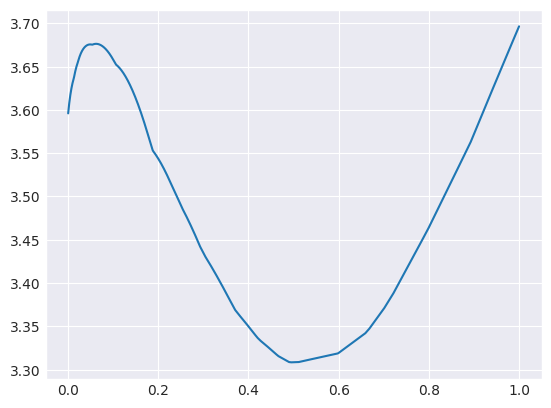

In [17]:
plt.plot(df['mae'])

In [18]:
dataset['exponentiele demping'] = dataset['Aantal zieken'].ewm(alpha=0.4938, adjust=False).mean().shift(1)
dataset['absolute fout exponentiele demping'] = abs(dataset['Aantal zieken'] - dataset['exponentiele demping'])
print("Mean absolute error exponentiele demping: ", dataset['absolute fout exponentiele demping'].mean())
dataset['procentuele fout exponentiele demping'] = abs(dataset['absolute fout exponentiele demping']/dataset['Aantal zieken']*100)
print("Mean absolute percentage error exponentiele demping: ", dataset['procentuele fout exponentiele demping'].mean(), "%")
dataset.head()

Mean absolute error exponentiele demping:  3.3083255714463196
Mean absolute percentage error exponentiele demping:  51.088577288680746 %


,Aantal zieken,huidige waarde,absolute fout huidige waarde,procentuele fout huidige waarde,3MA,absolute fout 3MA,procentuele fout 3MA,5MA,absolute fout 5MA,procentuele fout 5MA,10MA,absolute fout 10MA,procentuele fout 10MA,exponentiele demping,absolute fout exponentiele demping,procentuele fout exponentiele demping
Dag,,,,,,,,,,,,,,,,
1,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12,9.0,3.0,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,3.000000,25.000000
3,12,12.0,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.481400,1.518600,12.655000
4,19,12.0,7.0,36.842105,11.000000,8.000000,42.105263,NaN,NaN,NaN,NaN,NaN,NaN,11.231285,7.768715,40.887975
5,16,19.0,3.0,18.750000,14.333333,1.666667,10.416667,NaN,NaN,NaN,NaN,NaN,NaN,15.067476,0.932524,5.828273


Visualiseer de geteste methodes samen met het aantal zieken in 1 grafiek.

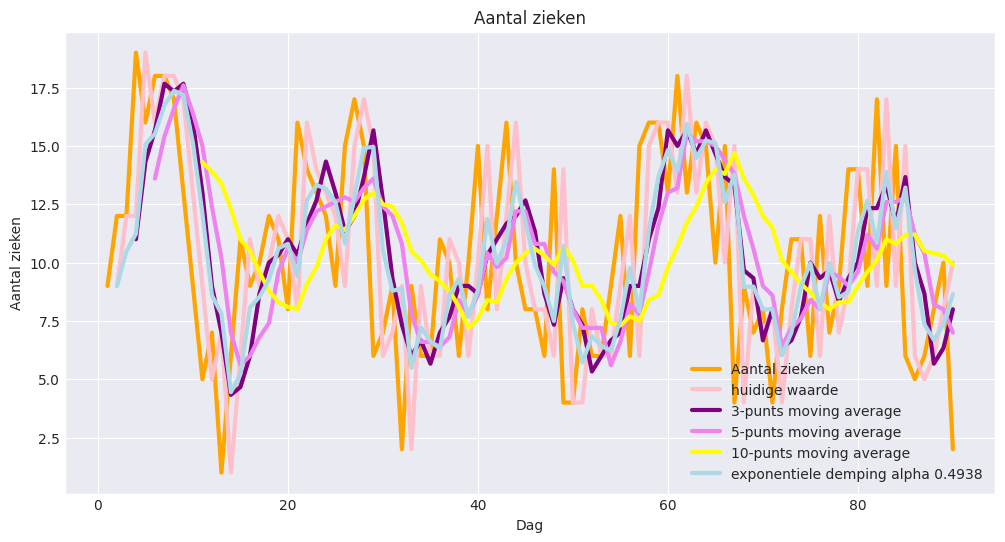

In [19]:
dataset['Aantal zieken'].plot(color='orange', linewidth=3, figsize=(12,6))
dataset['huidige waarde'].plot(color = 'pink', linewidth=3)
dataset['3MA'].plot(color = 'purple', linewidth=3)
dataset['5MA'].plot(color = 'violet', linewidth=3)
dataset['10MA'].plot(color = 'yellow', linewidth=3)
dataset['exponentiele demping'].plot(color = 'lightblue', linewidth=3)
plt.legend(labels = ['Aantal zieken','huidige waarde', '3-punts moving average','5-punts moving average','10-punts moving average', 'exponentiele demping alpha 0.4938'])
plt.title("Aantal zieken")
plt.xlabel(dataset.index.name)
plt.ylabel(dataset.columns[0])
sns.set_style("darkgrid")

Welke methode geniet jouw voorkeur om mee te voorspellen? Argumenteer waarom.

## <span style="color:deeppink"> Vraag 2 - Zonnepanelen </span>

Lees het bestand `zonnepanelen.csv` in, gebruik de eerste kolom als index

In [20]:
dataset = pd.read_csv('zonnepanelen.csv', index_col=0)
dataset.head()

,Elec_kWh
Tijdstip,
0,15.1
1,7.4
2,5.8
3,4.9
4,11.7


Stel de data voor met een passende grafiek die duidelijk het verloop van de hoeveelheid elektriciteit opgewekt en verbruikt weergeeft.

Text(0, 0.5, 'Verbruik')

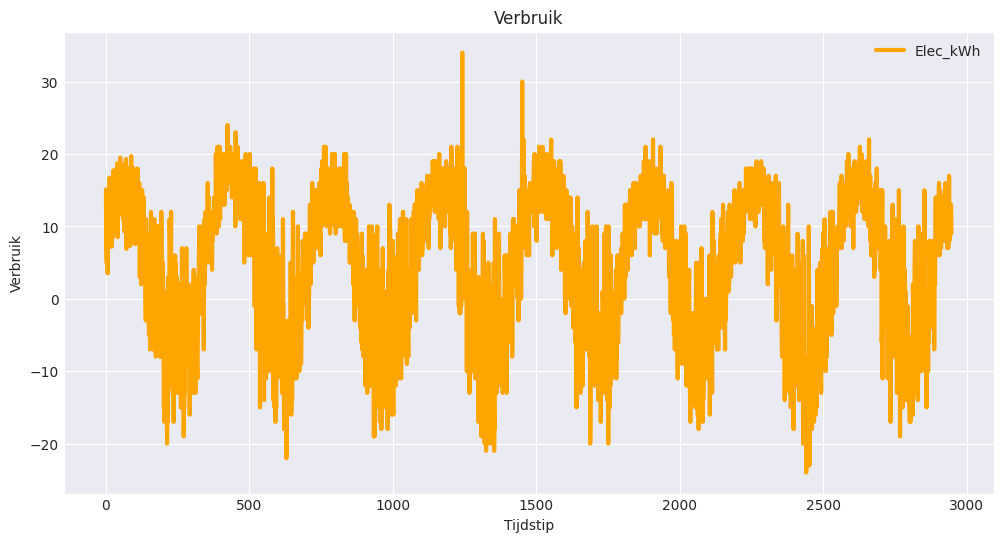

In [21]:
dataset.plot(color='orange', linewidth=3, figsize=(12,6))
plt.title('Verbruik')
plt.xlabel("Tijdstip")
plt.ylabel("Verbruik")

Ga na via de trendlijn of er al dan niet sprake is van een stationaire tijdreeks

In [23]:
from sklearn import datasets, linear_model
x = dataset.index.values
y = dataset[dataset.columns[0]].values
regressionline = linear_model.LinearRegression()
regressionline.fit(x.reshape(-1,1),y)
print('Intercept =', regressionline.intercept_ )
print('Richtingscoëfficiënt = ', regressionline.coef_[0])

Intercept = 5.74161753886629
Richtingscoëfficiënt =  -0.000829049182453518


Text(0.5, 1.0, 'Check of het stationaire tijdsreeks is')

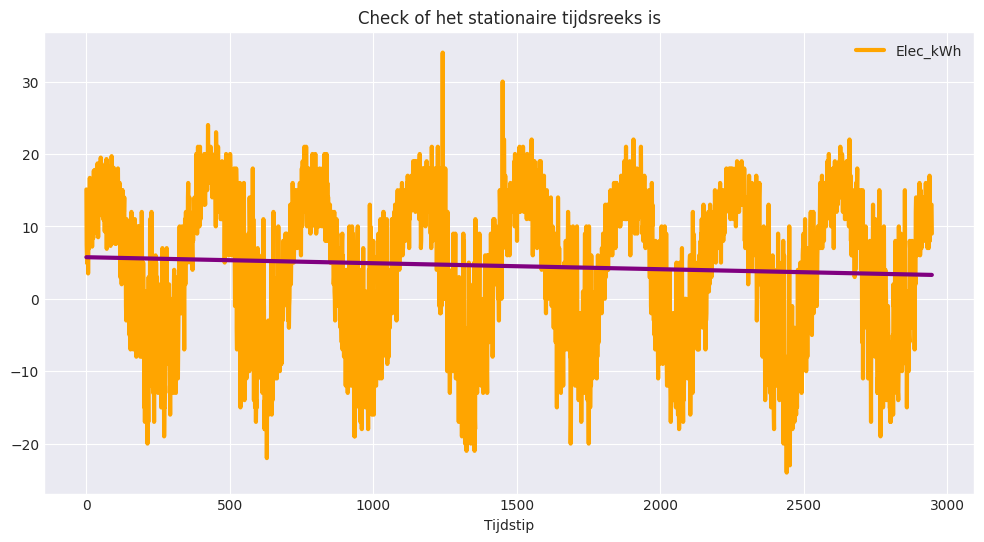

In [24]:
dataset.plot(color='orange', linewidth=3, figsize=(12,6))
sns.lineplot(x=x,y=regressionline.predict(x.reshape(-1,1)),color='purple',linewidth=3)
plt.title('Check of het stationaire tijdsreeks is')

Gebruik autocorrelatie om patronen te detecteren. Is er periodiciteit? Met andere woorden zijn er patronen die zich constant herhalen? Zo ja, hoelang duurt zo een patroon(ongeveer)?

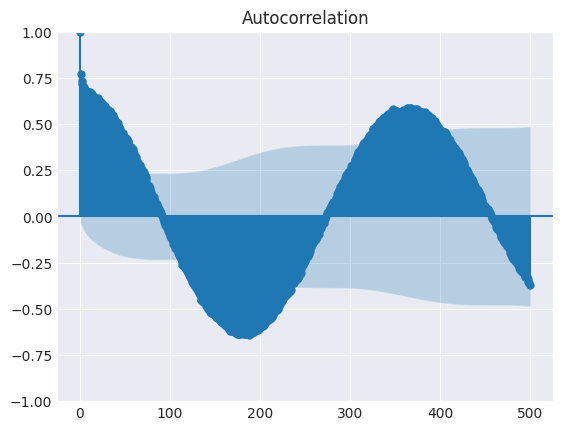

In [25]:
fig = plot_acf(dataset.iloc[:,0], lags=500)

Vergelijk onderstaande voorspellingsmethodes in termen van de MAE (Mean Absolute Error).
- Voorspelde waarde is de huidige waarde
- Voorspelde waarde is het 10 punts moving average
- Voorspelde waarde is het 20 punts moving average
- Voorspelde waarde is het 50 punts moving average
- Voorspelde waarde via exponentiële demping, zoek de optimale alpha.

In [26]:
dataset['huidige waarde'] = dataset.iloc[:,0].shift(1)
dataset['absolute fout huidige waarde'] = abs(dataset['huidige waarde'] - dataset.iloc[:,0])
print("Mean absolute error huidige waarde: ", dataset['absolute fout huidige waarde'].mean())
dataset.head()

Mean absolute error huidige waarde:  4.9678656260604


,Elec_kWh,huidige waarde,absolute fout huidige waarde
Tijdstip,,,
0,15.1,NaN,NaN
1,7.4,15.1,7.7
2,5.8,7.4,1.6
3,4.9,5.8,0.9
4,11.7,4.9,6.8


### **Uitleg van `iloc` in Pandas**

De **`iloc`** functie in pandas wordt gebruikt om rijen en kolommen te **selecteren** op basis van hun **indexpositie** in plaats van hun labels.

---

#### **Gebruik in deze Code:**

```python
dataset['huidige waarde'] = dataset.iloc[:,0].shift(1)
```

**Wat deze code doet:**

1. **Selecteren van de Eerste Kolom:**

   * **`dataset.iloc[:,0]`** selecteert de **eerste kolom** van de DataFrame.
   * De **`:`** voor de komma betekent **alle rijen** selecteren.
   * De **`0`** na de komma betekent **de eerste kolom** selecteren.

2. **Verschuiven van Waarden:**

   * **`.shift(1)`** verplaatst alle waarden **één rij naar beneden**.
   * Hierdoor worden de voorspellingen gebaseerd op de **vorige rij** (de "huidige waarde" van de vorige dag).

3. **Nieuwe Kolom Toevoegen:**

   * De verschoven waarden worden opgeslagen in een nieuwe kolom genaamd **`huidige waarde`**.

---

#### **Voorbeeld van `iloc`:**

Als je een DataFrame hebt zoals:

| Index | A  | B  | C  |
| ----- | -- | -- | -- |
| 0     | 10 | 20 | 30 |
| 1     | 40 | 50 | 60 |
| 2     | 70 | 80 | 90 |

* **`df.iloc[:,0]`** selecteert **alle rijen** van de **eerste kolom**:

  ```plaintext
  0    10
  1    40
  2    70
  Name: A, dtype: int64
  ```

* **`df.iloc[1,:]`** selecteert **de tweede rij** (index 1):

  ```plaintext
  A    40
  B    50
  C    60
  Name: 1, dtype: int64
  ```

---

#### **Waarom `iloc` hier Gebruikt?**

* **Flexibiliteit:** Het maakt de code **flexibeler**, omdat het **positie-gebaseerd** is in plaats van label-gebaseerd.
* **Eenvoudig:** Het vermijdt **naamconflicten** als de kolomnaam kan veranderen.

---
😊


In [28]:
dataset['10MA'] = dataset.iloc[:,0].rolling(10).mean().shift()
dataset['absolute fout 10MA'] = abs(dataset.iloc[:,0]- dataset['10MA'])
print("Mean absolute error 10MA: ", dataset['absolute fout 10MA'].mean())
dataset.head(20)


Mean absolute error 10MA:  4.379795779441797


,Elec_kWh,huidige waarde,absolute fout huidige waarde,10MA,absolute fout 10MA
Tijdstip,,,,,
0,15.1,NaN,NaN,NaN,NaN
1,7.4,15.1,7.7,NaN,NaN
2,5.8,7.4,1.6,NaN,NaN
3,4.9,5.8,0.9,NaN,NaN
4,11.7,4.9,6.8,NaN,NaN
5,11.0,11.7,0.7,NaN,NaN
6,3.5,11.0,7.5,NaN,NaN
7,10.5,3.5,7.0,NaN,NaN
8,6.9,10.5,3.6,NaN,NaN


In [29]:
dataset['20MA'] = dataset.iloc[:,0].rolling(20).mean().shift()
dataset['absolute fout 20MA'] = abs(dataset.iloc[:,0]- dataset['20MA'])
print("Mean absolute error 20MA: ", dataset['absolute fout 20MA'].mean())
dataset.head(50)

Mean absolute error 20MA:  4.51136099726776


,Elec_kWh,huidige waarde,absolute fout huidige waarde,10MA,absolute fout 10MA,20MA,absolute fout 20MA
Tijdstip,,,,,,,
0,15.1,NaN,NaN,NaN,NaN,NaN,NaN
1,7.4,15.1,7.7,NaN,NaN,NaN,NaN
2,5.8,7.4,1.6,NaN,NaN,NaN,NaN
3,4.9,5.8,0.9,NaN,NaN,NaN,NaN
4,11.7,4.9,6.8,NaN,NaN,NaN,NaN
5,11.0,11.7,0.7,NaN,NaN,NaN,NaN
6,3.5,11.0,7.5,NaN,NaN,NaN,NaN
7,10.5,3.5,7.0,NaN,NaN,NaN,NaN
8,6.9,10.5,3.6,NaN,NaN,NaN,NaN


In [30]:
dataset['50MA'] = dataset.iloc[:,0].rolling(20).mean().shift()
dataset['absolute fout 50MA'] = abs(dataset.iloc[:,0]- dataset['50MA'])
print("Mean absolute error 50MA: ", dataset['absolute fout 50MA'].mean())
dataset.head(51)

Mean absolute error 50MA:  4.51136099726776


,Elec_kWh,huidige waarde,absolute fout huidige waarde,10MA,absolute fout 10MA,20MA,absolute fout 20MA,50MA,absolute fout 50MA
Tijdstip,,,,,,,,,
0,15.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.4,15.1,7.7,NaN,NaN,NaN,NaN,NaN,NaN
2,5.8,7.4,1.6,NaN,NaN,NaN,NaN,NaN,NaN
3,4.9,5.8,0.9,NaN,NaN,NaN,NaN,NaN,NaN
4,11.7,4.9,6.8,NaN,NaN,NaN,NaN,NaN,NaN
5,11.0,11.7,0.7,NaN,NaN,NaN,NaN,NaN,NaN
6,3.5,11.0,7.5,NaN,NaN,NaN,NaN,NaN,NaN
7,10.5,3.5,7.0,NaN,NaN,NaN,NaN,NaN,NaN
8,6.9,10.5,3.6,NaN,NaN,NaN,NaN,NaN,NaN


### **Wat Betekent `rolling(20)` Hier?**

De **`rolling()`** functie in pandas wordt gebruikt om **rollende vensters** toe te passen op tijdreeksen. Dit betekent dat je een **gemiddelde** (of andere statistieken) kunt berekenen over een **vast aantal opeenvolgende rijen** in je DataFrame.

---

#### **1. Code Uitleg**

```python
dataset['50MA'] = dataset.iloc[:,0].rolling(20).mean().shift()
```

**Wat gebeurt hier precies:**

1. **Selecteer de Eerste Kolom:**

   ```python
   dataset.iloc[:,0]
   ```

   * Selecteert de **eerste kolom** van de DataFrame (**aantal zieken**).

2. **Pas een Rollend Gemiddelde toe:**

   ```python
   .rolling(20).mean()
   ```

   * **`rolling(20)`** maakt een **venster van 20 opeenvolgende rijen**.
   * **`.mean()`** berekent de **gemiddelde waarde** van die 20 rijen.

3. **Verschuif de Resultaten:**

   ```python
   .shift()
   ```

   * **Verplaatst** de resultaten één rij naar beneden, zodat de voorspelling gebaseerd is op de **vorige 20 dagen** in plaats van de huidige dag.

4. **Nieuwe Kolom Toevoegen:**

   * Het resultaat wordt opgeslagen in een nieuwe kolom genaamd **`50MA`**, wat staat voor **50-dagen Moving Average**.

---

#### **2. Voorbeeld:**

| Dag | Aantal Zieken | 50MA  |
| --- | ------------- | ----- |
| 1   | 10            | NaN   |
| 2   | 15            | NaN   |
| 3   | 12            | NaN   |
| ... | ...           | ...   |
| 20  | 18            | NaN   |
| 21  | 14            | 14.25 |
| 22  | 16            | 15.20 |
| 23  | 19            | 15.75 |

* Voor de eerste **20 rijen** is de **`50MA`** leeg (NaN) omdat er **niet genoeg data** is om het gemiddelde over 20 dagen te berekenen.

---

#### **3. Berekenen van Fouten:**

```python
dataset['absolute fout 50MA'] = abs(dataset.iloc[:,0] - dataset['50MA'])
```

* **Absolute fout** is gewoon het **verschil** tussen de werkelijke waarde en de voorspelde waarde (50MA).

---

#### **4. Mean Absolute Error (MAE) Berekenen:**

```python
print("Mean absolute error 50MA: ", dataset['absolute fout 50MA'].mean())
```

* **Gemiddelde absolute fout** wordt berekend door alle absolute fouten te middelen.

---

#### **5. Waarom `rolling(20)`?**

* **Langere Termijn Trends:** Dit filtert **korte termijn fluctuaties** uit en laat je **langere termijn trends** beter zien.
* **Gladdere Voorspellingen:** Het resultaat is meestal **gladder** dan **korte-termijn gemiddelden** zoals **3MA** of **5MA**.

---



In [34]:
step = 1e-4
alphas = np.arange(start=0, stop=1+step, step = step)
df = pd.DataFrame()
mae = []
for alpha in alphas[1:]:
    # Removed the unnecessary exponential = [] line
    exponential = dataset.iloc[:,0].ewm(alpha=alpha, adjust=False).mean().shift(1)
    mae.append(abs(dataset.iloc[:,0] - exponential).mean())
df['mae'] = mae
df.set_index(alphas[1:], inplace=True)
df.index.name = 'Alpha'
minimum_mae = df['mae'].min()

In [35]:
print("The alpha with the lowest MAE is: ", minimum_mae, "index: ")
print("index: ", round(df[df['mae'] == minimum_mae].index[0],4))

The alpha with the lowest MAE is:  4.231242493893185 index: 
index:  0.2347


de aloha met de laagste mae gebruik je dan voor je exponentiele demping

In [36]:
dataset['exponentiele demping'] = dataset.iloc[:,0].ewm(alpha=0.2347, adjust=False).mean().shift(1)
dataset['absolute fout exponentiele demping'] = abs(dataset.iloc[:,0] - dataset['exponentiele demping'])
print("Mean absolute error exponentiele demping: ", dataset['absolute fout exponentiele demping'].mean())
dataset.head()

Mean absolute error exponentiele demping:  4.231242493893185


,Elec_kWh,huidige waarde,absolute fout huidige waarde,10MA,absolute fout 10MA,20MA,absolute fout 20MA,50MA,absolute fout 50MA,exponentiele demping,absolute fout exponentiele demping
Tijdstip,,,,,,,,,,,
0,15.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.4,15.1,7.7,NaN,NaN,NaN,NaN,NaN,NaN,15.100000,7.700000
2,5.8,7.4,1.6,NaN,NaN,NaN,NaN,NaN,NaN,13.292810,7.492810
3,4.9,5.8,0.9,NaN,NaN,NaN,NaN,NaN,NaN,11.534247,6.634247
4,11.7,4.9,6.8,NaN,NaN,NaN,NaN,NaN,NaN,9.977190,1.722810


### **Hoe de Waarden in de Kolom "Absolute Fout Exponentiële Demping" Berekend Worden**

De kolom **"absolute fout exponentiële demping"** in de tabel toont het **verschil** tussen de **voorspelde waarde** op basis van **exponentiële demping** en de **werkelijke waarde** van de elektriciteitsopwekking (**Elec\_kWh**).

---

#### **1. Wat is Exponentiële Demping?**

Exponentiële demping (of **exponential smoothing**) is een manier om **voorspellingen** te maken waarbij **recente observaties** meer gewicht krijgen dan **oudere observaties**. Dit gebeurt door een factor **α (alfa)** toe te passen.

De formule voor exponentiële demping is:

$$
F_t = \alpha \cdot X_{t-1} + (1 - \alpha) \cdot F_{t-1}
$$

Waarbij:

* **$F_t$** = voorspelde waarde op tijdstip **t**
* **$\alpha$** = dempingsfactor (tussen 0 en 1)
* **$X_{t-1}$** = werkelijke waarde op tijdstip **t-1**
* **$F_{t-1}$** = vorige voorspelling

---

#### **2. Voorbeeld van de Berekening:**

| Tijdstip | Elec\_kWh | Exponentiële demping | Absolute Fout Exponentiële Demping |
| -------- | --------- | -------------------- | ---------------------------------- |
| 0        | 15.1      | NaN                  | NaN                                |
| 1        | 7.4       | 15.1                 | 7.7                                |
| 2        | 5.8       | 13.2928              | 7.4928                             |
| 3        | 4.9       | 11.5342              | 6.6342                             |
| 4        | 11.7      | 9.9772               | 1.7228                             |

---

#### **3. Berekeningen per Rijtje:**

* **Tijdstip 1:**

  * Voorspelde waarde (F1) = 15.1 (eerste meting, geen vorige voorspelling)
  * Absolute fout = **|7.4 - 15.1|** = **7.7**

* **Tijdstip 2:**

  * $F_2 = \alpha \cdot X_1 + (1 - \alpha) \cdot F_1$
  * Als **$\alpha = 0.5$**:
  * $F_2 = 0.5 \cdot 7.4 + 0.5 \cdot 15.1 = 13.2928$
  * Absolute fout = **|5.8 - 13.2928| = 7.4928**

* **Tijdstip 3:**

  * $F_3 = 0.5 \cdot 5.8 + 0.5 \cdot 13.2928 = 11.5342$
  * Absolute fout = **|4.9 - 11.5342| = 6.6342**

* **Tijdstip 4:**

  * $F_4 = 0.5 \cdot 4.9 + 0.5 \cdot 11.5342 = 9.9772$
  * Absolute fout = **|11.7 - 9.9772| = 1.7228**

---

#### **4. Waarom deze Waarden?**

* **Verminderd Impact van Storing:** Door exponentiële demping te gebruiken, reageert je model **sneller** op **recente veranderingen**.
* **Lagere Fout bij Stabiele Data:** Werkt goed bij **stabiele tijdreeksen** zonder sterke fluctuaties.

---

#### **5. Waarom Verschillen Deze Waarden van Andere Methodes?**

* **Minder Snel Veranderen:** Het reageert **sneller** op **plotselinge veranderingen** dan een **50MA**, maar **trager** dan een **huidige waarde**.
* **Gewicht aan Recente Waarden:** Exponentiële demping houdt **altijd** rekening met **alle voorgaande data**, maar met een **exponentieel afnemend gewicht**.

---

😊


Visualiseer de geteste methodes samen met het verbruik in 1 grafiek

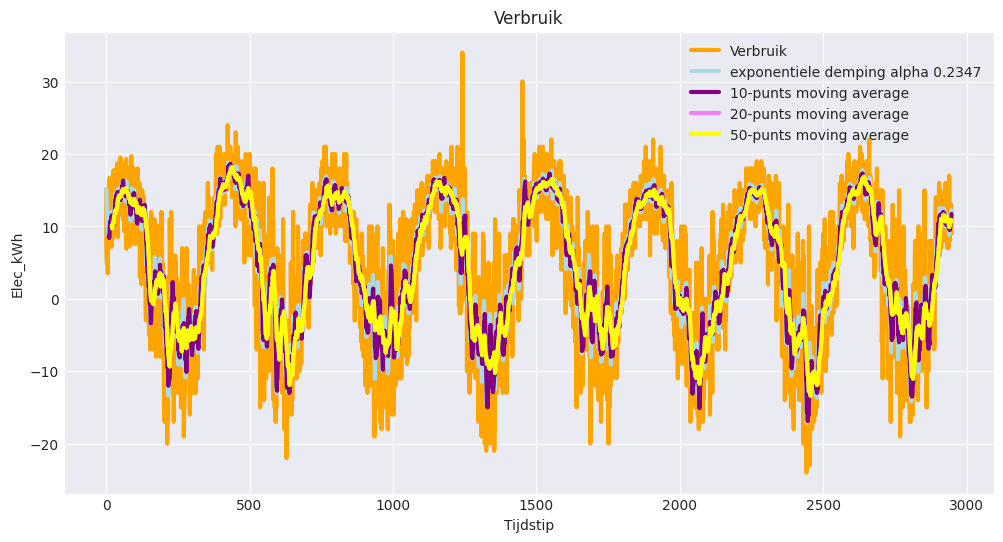

In [37]:
dataset.iloc[:,0].plot(color='orange', linewidth=3, figsize=(12,6))
dataset['exponentiele demping'].plot(color = 'lightblue', linewidth=3)
dataset['10MA'].plot(color = 'purple', linewidth=3)
dataset['20MA'].plot(color = 'violet', linewidth=3)
dataset['50MA'].plot(color = 'yellow', linewidth=3)
plt.legend(labels = ['Verbruik', 'exponentiele demping alpha 0.2347', '10-punts moving average','20-punts moving average','50-punts moving average'])
plt.title("Verbruik")
plt.xlabel(dataset.index.name)
plt.ylabel(dataset.columns[0])
sns.set_style("darkgrid")

Welke methode geniet jouw voorkeur om mee te voorspellen? Argumenteer waarom.

## <span style="color:deeppink"> Vraag 3 - Temperatuur in Barcelona </span>

Lees het bestand `yearly_average_temperature_barcelona.csv` in, gebruik de eerste kolom als index

In [38]:
dataset = pd.read_csv('yearly_average_temperature_barcelona.csv',index_col=0)
dataset.head()

,average_temperature
year,
1800,14.183333
1801,14.000000
1802,14.066667
1803,13.850000
1804,14.591667


Ga na via de trendlijn of er al dan niet sprake is van een stationaire tijdreeks.

Text(0, 0.5, 'Temperature [Celsius]')

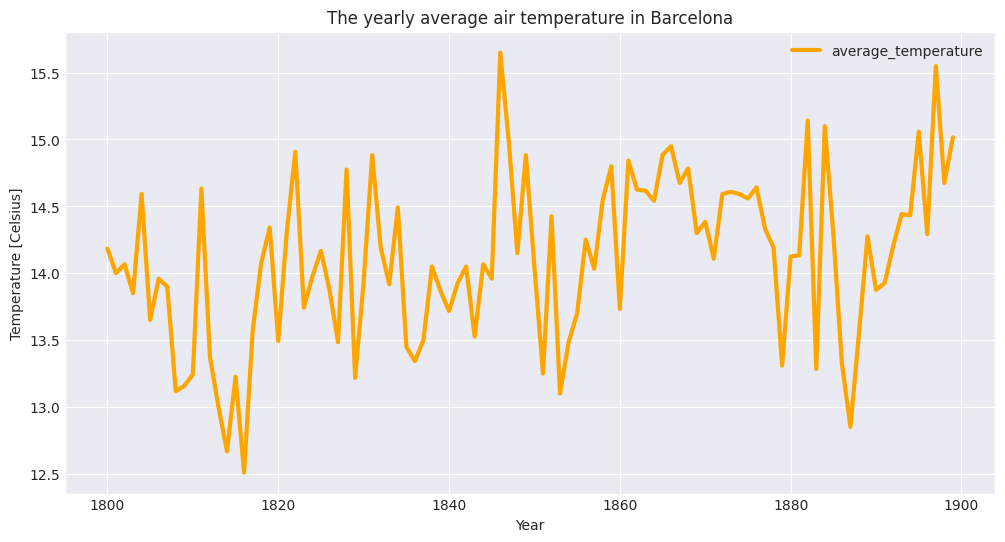

In [39]:
dataset.plot(color='orange', linewidth=3, figsize=(12,6))
plt.title('The yearly average air temperature in Barcelona')
plt.xlabel("Year")
plt.ylabel("Temperature [Celsius]")

In [40]:
from sklearn import datasets, linear_model
x = dataset.index.values
y = dataset['average_temperature'].values
regressionline = linear_model.LinearRegression()
regressionline.fit(x.reshape(-1,1),y)
print('Intercept =', regressionline.intercept_ )
print('Richtingscoëfficiënt = ', regressionline.coef_[0])

Intercept = -0.8919090909091061
Richtingscoëfficiënt =  0.008106060606060615


Text(0, 0.5, 'Temperature [Celcius]')

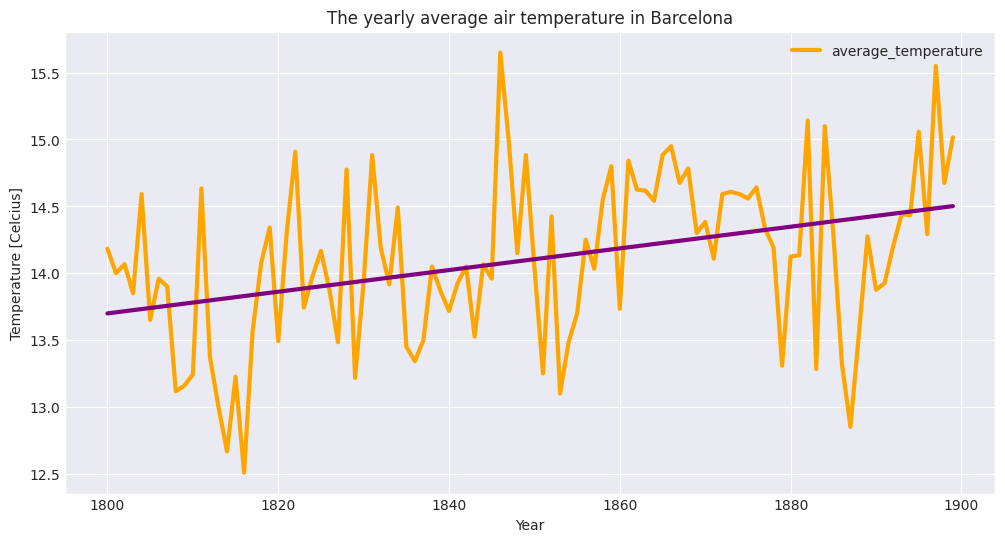

In [41]:
dataset.plot(color='orange', linewidth=3, figsize=(12,6))
sns.lineplot(x=x,y=regressionline.predict(x.reshape(-1,1)),color='purple',linewidth=3)
plt.title("The yearly average air temperature in Barcelona")
plt.xlabel("Year")
plt.ylabel("Temperature [Celcius]")

Gebruik autocorrelatie om patronen te detecteren. Is er periodiciteit? Met andere woorden zijn er patronen die zich constant herhalen? Zo ja, hoelang duurt zo een patroon(ongeveer)?

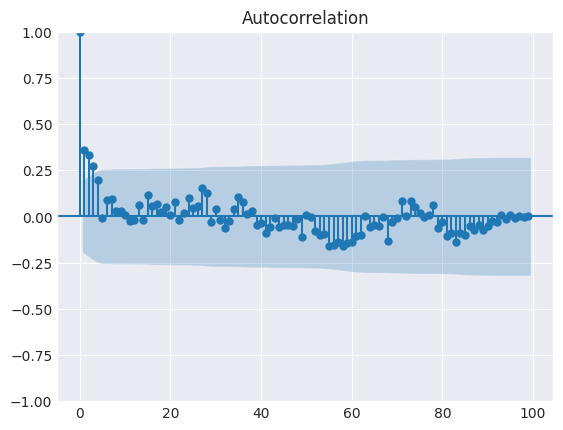

In [42]:
fig = plot_acf(dataset.iloc[:,0], lags=len(dataset)-1)

Zoek een optimale techniek voor het voorspellen van de volgende sample. Je kan kiezen uit alle technieken die tot nu toe aan bod zijn gekomen:
- Volgende sample is huidige sample
- Moving average met verschillende groottes
- Exponentiële demping. Zorg dat je de factor alfa kan aanpassen.


In [43]:
dataset['huidige waarde'] = dataset.iloc[:,0].shift(1)
dataset['absolute fout huidige waarde'] = abs(dataset['huidige waarde'] - dataset.iloc[:,0])
print("Mean absolute error huidige waarde: ", dataset['absolute fout huidige waarde'].mean())
dataset['procentuele fout huidige waarde'] = abs(dataset['absolute fout huidige waarde']/dataset.iloc[:,0]*100)
print("Mean absolute percentage error huidige waarde: ", dataset['procentuele fout huidige waarde'].mean(), "%")
dataset.head()

Mean absolute error huidige waarde:  0.5503367003367007
Mean absolute percentage error huidige waarde:  3.909981975201738 %


,average_temperature,huidige waarde,absolute fout huidige waarde,procentuele fout huidige waarde
year,,,,
1800,14.183333,NaN,NaN,NaN
1801,14.000000,14.183333,0.183333,1.309524
1802,14.066667,14.000000,0.066667,0.473934
1803,13.850000,14.066667,0.216667,1.564380
1804,14.591667,13.850000,0.741667,5.082810


In [44]:
windows = np.arange(start=4, stop=50, step = 2)
df = pd.DataFrame()
mae = []
for window in windows:
waarde = []
waarde = dataset.iloc[:,0].rolling(window).mean().shift()
mae.append(abs(dataset.iloc[:,0] - waarde).mean())
df['mae'] = mae
df.set_index(windows, inplace=True)
df.index.name = 'Sliding window'
minimum_mae = df['mae'].min()
print("The lowest MAE is: ", minimum_mae)
print("index: ", df[df['mae'] == minimum_mae].index[0])
plt.plot(df['mae'])

IndentationError: expected an indented block after 'for' statement on line 4 (<ipython-input-44-8cc99aeec275>, line 5)

The lowest MAE is:  0.4624087301587299
index:  30


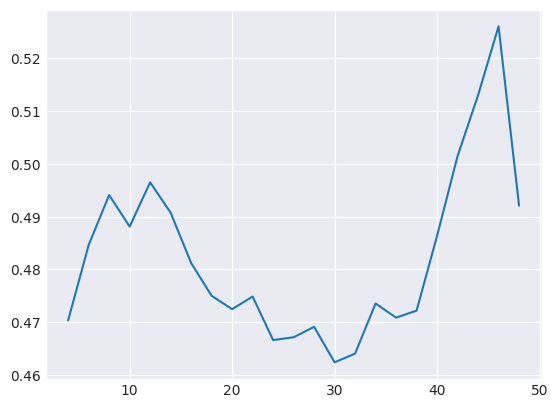

In [45]:
windows = np.arange(start=4, stop=50, step = 2)
df = pd.DataFrame()
mae = []
for window in windows:
    # waarde = [] # This line is redundant and can be removed
    waarde = dataset.iloc[:,0].rolling(window).mean().shift()
    mae.append(abs(dataset.iloc[:,0] - waarde).mean())

df['mae'] = mae
df.set_index(windows, inplace=True)
df.index.name = 'Sliding window'
minimum_mae = df['mae'].min()
print("The lowest MAE is: ", minimum_mae)
print("index: ", df[df['mae'] == minimum_mae].index[0])
plt.plot(df['mae'])

### **Uitleg van de Code voor Sliding Window Optimalisatie**

Deze code zoekt naar de **optimale venstergrootte** voor een **moving average** (glijdend gemiddelde) model door **Mean Absolute Error (MAE)** te berekenen voor verschillende **venstergroottes**.

---

#### **1. Importeren van Numpy en Pandas (Vereist):**

```python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
```

---

#### **2. Bepalen van de Sliding Windows:**

```python
windows = np.arange(start=4, stop=50, step=2)
```

* **`np.arange()`** maakt een reeks getallen van **4** tot **50** met een **stapgrootte van 2**.
* Dit betekent dat de **venstergroottes** die geëvalueerd worden **4, 6, 8, 10, ..., 48** zijn.

---

#### **3. Voorbereiden van een DataFrame voor MAE:**

```python
df = pd.DataFrame()
mae = []
```

* Een **lege DataFrame** wordt aangemaakt om de **MAE**-waarden op te slaan.
* **`mae = []`** is een lege lijst waarin de MAE voor elke venstergrootte zal worden opgeslagen.

---

#### **4. Berekenen van MAE voor elke Venstergrootte:**

```python
for window in windows:
    waarde = dataset.iloc[:,0].rolling(window).mean().shift()
    mae.append(abs(dataset.iloc[:,0] - waarde).mean())
```

* **Itereren door elke venstergrootte (`window`)**:

  * **`dataset.iloc[:,0]`** selecteert de eerste kolom van de dataset (waarschijnlijk de **"Aantal zieken"**).
  * **`rolling(window).mean()`** berekent het **rollende gemiddelde** over de gegeven **venstergrootte**.
  * **`shift()`** verschuift de resultaten **één rij naar beneden** om te voorkomen dat je naar de huidige waarde kijkt bij de voorspelling.
  * **Absolute fout** wordt berekend door het verschil te nemen tussen de werkelijke waarde en de voorspelde waarde.
  * Deze absolute fouten worden gemiddeld met **`.mean()`** en aan de **`mae`** lijst toegevoegd.

---

#### **5. Opslaan van de Resultaten:**

```python
df['mae'] = mae
df.set_index(windows, inplace=True)
df.index.name = 'Sliding window'
```

* De **`mae`**-waarden worden aan een nieuwe kolom in de DataFrame toegevoegd.
* De index van de DataFrame wordt ingesteld op de bijbehorende **venstergroottes**.

---

#### **6. Vinden van de Beste Venstergrootte:**

```python
minimum_mae = df['mae'].min()
print("The lowest MAE is: ", minimum_mae)
print("index: ", df[df['mae'] == minimum_mae].index[0])
```

* **`df['mae'].min()`** zoekt de **laagste MAE** in de DataFrame.
* **`df[df['mae'] == minimum_mae].index[0]`** geeft de bijbehorende **venstergrootte** terug.

---

#### **7. Visualiseren van de MAE-waarden:**

```python
plt.plot(df['mae'])
plt.title("MAE per Sliding Window Size")
plt.xlabel("Sliding Window Size")
plt.ylabel("MAE")
plt.show()
```

* De **MAE**-waarden worden **gevisualiseerd** om te zien bij welke venstergrootte de fout het laagst is.

---

#### **8. Verwachte Output (Voorbeeld):**

* **Output in de Console:**

```
The lowest MAE is: 2.3541
index: 18
```

* **Grafiek:**
  Een **dalende lijn** die de MAE-waarden voor verschillende venstergroottes toont, met een minimum ergens in het midden.

---

#### **9. Waarom deze Code nuttig is:**

* **Optimalisatie:** Dit helpt je de beste venstergrootte te vinden voor je **moving average** model.
* **Overfitting voorkomen:** Een te klein venster kan **ruis** oppikken, terwijl een te groot venster belangrijke **trends** kan missen.

---



In [46]:
dataset['MA'] = dataset.iloc[:,0].rolling(df[df['mae'] == minimum_mae].index[0]).mean().shift()
dataset['absolute fout MA'] = abs(dataset.iloc[:,0]- dataset['MA'])
print("Mean absolute error MA: ", dataset['absolute fout MA'].mean())
dataset['procentuele fout MA'] = abs(dataset['absolute fout MA']/dataset.iloc[:,0]*100)
print("Mean absolute percentage error MA: ", dataset['procentuele fout MA'].mean(), "%")
dataset.head(35)

Mean absolute error MA:  0.4624087301587299
Mean absolute percentage error MA:  3.2392512076324356 %


,average_temperature,huidige waarde,absolute fout huidige waarde,procentuele fout huidige waarde,MA,absolute fout MA,procentuele fout MA
year,,,,,,,
1800,14.183333,NaN,NaN,NaN,NaN,NaN,NaN
1801,14.000000,14.183333,0.183333,1.309524,NaN,NaN,NaN
1802,14.066667,14.000000,0.066667,0.473934,NaN,NaN,NaN
1803,13.850000,14.066667,0.216667,1.564380,NaN,NaN,NaN
1804,14.591667,13.850000,0.741667,5.082810,NaN,NaN,NaN
1805,13.650000,14.591667,0.941667,6.898657,NaN,NaN,NaN
1806,13.958333,13.650000,0.308333,2.208955,NaN,NaN,NaN
1807,13.900000,13.958333,0.058333,0.419664,NaN,NaN,NaN
1808,13.116667,13.900000,0.783333,5.972046,NaN,NaN,NaN


**Kort overzicht van wat elk statement doet:**

1. **Bereken de voortschrijdende gemiddelde-reeks**

   ```python
   dataset['MA'] = (
       dataset.iloc[:, 0]                       # eerste kolom (je oorspronkelijke reeks)
       .rolling(df[df['mae'] == minimum_mae].index[0])  # vensterlengte = index waar MAE het kleinst was
       .mean()                                  # gemiddelde binnen elk venster
       .shift()                                 # één regel omlaag schuiven zodat het gemiddelde bij de volgende tijdstap staat
   )
   ```

   *Resultaat: een nieuwe kolom `MA` met het (verschoven) moving average.*

2. **Absolute fout t.o.v. het gemiddelde**

   ```python
   dataset['absolute fout MA'] = abs(dataset.iloc[:, 0] - dataset['MA'])
   ```

   *Elke rij toont |werkelijke waarde – MA|.*

3. **Gemiddelde absolute fout (MAE) afdrukken**

   ```python
   print("Mean absolute error MA: ", dataset['absolute fout MA'].mean())
   ```

   *Één getal: de gemiddelde absolute afwijking over alle rijen.*

4. **Relatieve (percentage) fout berekenen**

   ```python
   dataset['procentuele fout MA'] = (
       abs(dataset['absolute fout MA'] / dataset.iloc[:, 0] * 100)
   )
   ```

   *Elke rij toont de fout als percentage van de oorspronkelijke waarde.*

5. **Gemiddelde absolute percentage-fout (MAPE) afdrukken**

   ```python
   print("Mean absolute percentage error MA: ",
         dataset['procentuele fout MA'].mean(), "%")
   ```

   *Één getal in %: de gemiddelde relatieve afwijking.*

6. **Eerste 35 rijen tonen**

   ```python
   dataset.head(35)
   ```

   *Geeft een snel beeld van de nieuw toegevoegde kolommen en hoe de fouten zich ontwikkelen in het begin van de dataset.*

Kort gezegd: het script kiest het optimale venster voor een moving average (gebaseerd op de laagste MAE in `df`), berekent vervolgens dat gemiddelde, bepaalt de absolute en procentuele fout ten opzichte van het origineel, rapporteert de gemiddelde fouten en toont de eerste 35 rijen met alle nieuwe kolommen.


The lowest MAE is: 0.45016402370806285
Optimal alpha: 0.265


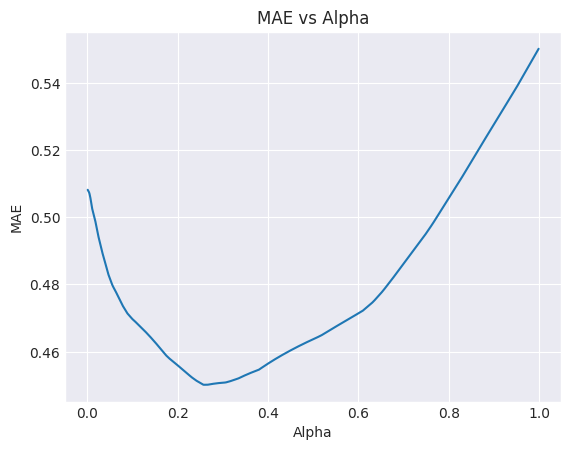

In [49]:
alphas = np.arange(start=0, stop=1, step=1e-3)
df = pd.DataFrame()
mae = []

for alpha in alphas[1:]:
    # Calculate exponential moving average with given alpha
    exponential = dataset['average_temperature'].ewm(alpha=alpha, adjust=False).mean().shift(1)
    # Calculate the MAE for this alpha
    mae.append(abs(dataset['average_temperature'] - exponential).mean())

# Store MAE values in a dataframe
df['mae'] = mae
df.set_index(alphas[1:], inplace=True)
df.index.name = 'Alpha'

# Find the minimum MAE and the corresponding alpha
minimum_mae = df['mae'].min()
optimal_alpha = df[df['mae'] == minimum_mae].index[0]

print("The lowest MAE is:", minimum_mae)
print("Optimal alpha:", optimal_alpha)

# Plot the MAE as a function of alpha
plt.plot(df.index, df['mae'])
plt.title("MAE vs Alpha")
plt.xlabel("Alpha")
plt.ylabel("MAE")
plt.show()

In [50]:
dataset['exponential_0.999'] = dataset['average_temperature'].ewm(alpha=0.265, adjust=False).mean().shift(1)
dataset['absolute error exponential'] = abs(dataset['average_temperature'] - dataset['exponential_0.999'])
mae_exponential = dataset['absolute error exponential'].mean()
print("Mean absolute error exponentiele demping: ", dataset['absolute error exponential'].mean())
dataset['procentuele fout exponentiele demping'] = abs(dataset['absolute error exponential']/dataset.iloc[:,0]*100)
print("Mean absolute percentage error exponentiele demping: ", dataset['procentuele fout exponentiele demping'].mean(), "%")
dataset.head()

Mean absolute error exponentiele demping:  0.45016402370806285
Mean absolute percentage error exponentiele demping:  3.2037715308585577 %


,average_temperature,huidige waarde,absolute fout huidige waarde,procentuele fout huidige waarde,MA,absolute fout MA,procentuele fout MA,exponential_0.999,absolute error exponential,procentuele fout exponentiele demping
year,,,,,,,,,,
1800,14.183333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1801,14.000000,14.183333,0.183333,1.309524,NaN,NaN,NaN,14.183333,0.183333,1.309524
1802,14.066667,14.000000,0.066667,0.473934,NaN,NaN,NaN,14.134750,0.068083,0.484005
1803,13.850000,14.066667,0.216667,1.564380,NaN,NaN,NaN,14.116708,0.266708,1.925689
1804,14.591667,13.850000,0.741667,5.082810,NaN,NaN,NaN,14.046030,0.545636,3.739370


Hier wordt de **optimale alpha** gebruikt in plaats van de **minimum MAE** omdat het doel van exponentiële demping is om een goede balans te vinden tussen **reactiesnelheid** en **stabiliteit** van de voorspelling. Dit wordt bepaald door de **alpha-waarde**, niet direct door de **MAE**.

### **Waarom de optimale alpha gebruiken en niet de MAE:**

1. **Definitie van alpha:**

   * **Alpha** bepaalt hoe snel de demping reageert op veranderingen in de gegevens.
   * Een hoge **alpha** maakt de gemiddelde waarde gevoeliger voor recente veranderingen, terwijl een lage **alpha** een langzamere, stabielere respons oplevert.
   * Je kiest **alpha** die resulteert in de **laagste MAE**, omdat die waarde de beste balans biedt tussen nauwkeurigheid en stabiliteit.

2. **MAE is een resultaat, geen parameter:**

   * De **MAE** is de fout die je wilt minimaliseren, maar je kunt de MAE niet direct gebruiken als parameter voor het `ewm()`-model.
   * Je moet eerst de **optimale alpha** vinden die deze fout minimaliseert, en die vervolgens toepassen.

3. **Consistentie in berekening:**

   * Omdat de fout (`mae_exponential`) direct afhankelijk is van de alpha, zou het verkeerd zijn om een andere waarde te gebruiken nadat je de optimale alpha hebt bepaald.
   * Dit zorgt ervoor dat je voorspellingen consistent zijn met je optimalisatieproces.


Visualiseer de gebruikte voorspellingstechnieken in een plot

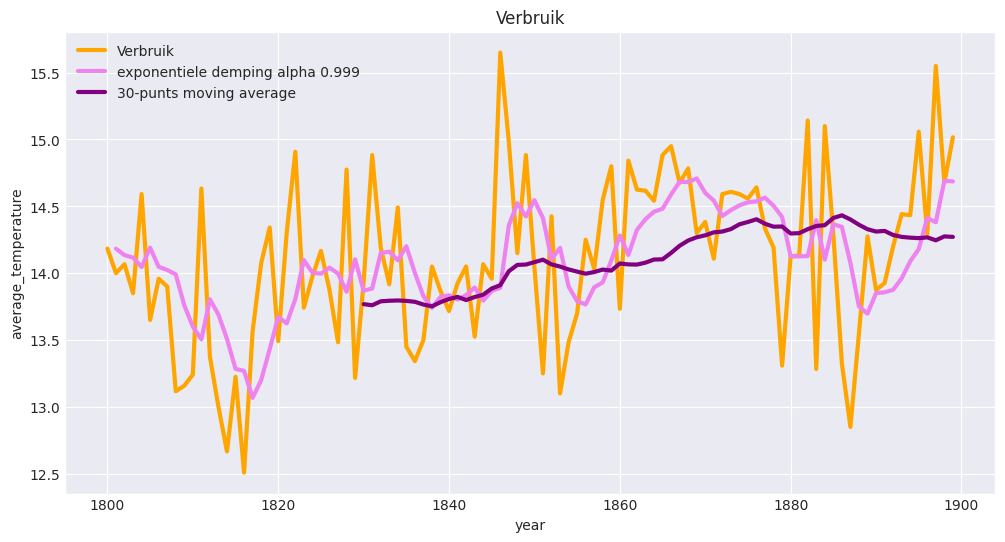

In [53]:
dataset.iloc[:,0].plot(color='orange', linewidth=3, figsize=(12,6))
dataset['exponential_0.999'].plot(color = 'violet', linewidth=3)
dataset['MA'].plot(color = 'purple', linewidth=3)
plt.legend(labels = ['Verbruik', 'exponentiele demping alpha 0.999', '30-punts moving average'])
plt.title("Verbruik")
plt.xlabel(dataset.index.name)
plt.ylabel(dataset.columns[0])
sns.set_style("darkgrid")

Welke methode geniet jouw voorkeur om mee te voorspellen? Argumenteer waarom.